In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

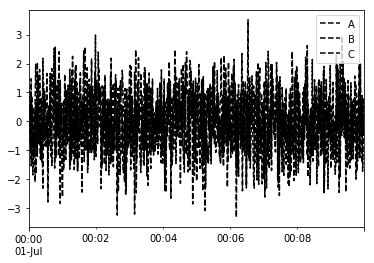

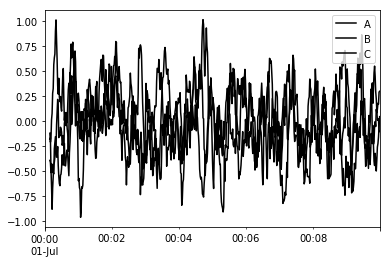

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.344712,0.232567,0.401973
2016-07-01 00:00:02,0.126637,0.315056,0.279895
2016-07-01 00:00:03,-0.243684,0.374558,0.364868
2016-07-01 00:00:04,0.196538,-0.115505,0.039717
2016-07-01 00:00:05,-0.126802,0.111337,0.064035
2016-07-01 00:00:06,-0.016465,0.056246,-0.116093
2016-07-01 00:00:07,-0.365462,-0.096702,0.001066
2016-07-01 00:00:08,-0.524479,-0.149471,-0.203670
2016-07-01 00:00:09,-0.583811,-0.322603,-0.250604


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,1.504195,-1.080434,1.996856,0.654331
2016-06-07,-0.861023,0.384787,-0.170978,0.613358
2016-06-08,2.526954,0.291862,-0.256533,-0.737150
2016-06-09,0.439362,-0.022295,-1.390237,-1.816468
2016-06-10,-1.153066,-0.220431,0.058882,-0.063859


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10aa14dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10aca14a8>], dtype=object)

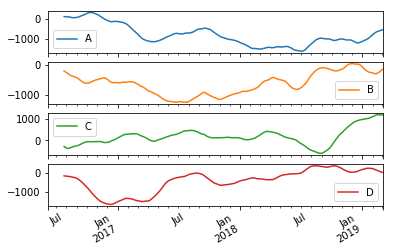

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.029580,0.647865,1.189199,1.599902


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,1.073683,-0.888040,1.911366,0.961010
2016-06-08,1.772498,-0.726622,1.797359,0.817520
2016-06-09,2.231745,-0.651487,1.392796,0.291658
2016-06-10,2.276681,-0.650492,1.161835,-0.036631


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# It will provide a less stable statistics given it only captures data from that window.
# When might one vs. the other be appropriate?
# Rolling captures info over time whereas a window might show the specific characteristics of seasonality

In [12]:
# EWMA
# Why use EWMA?
# If we are introducing new variables that are expected to significantly change the average we may want to look at 
# and consider more of the EWMA to ensure we capture historical data as well. 

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [14]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [19]:
dfa = pd.DataFrame(np.random.randn(1000, 3), index=pd.date_range('1/1/2000', periods=1000),
                   columns=['A', 'B', 'C'])

In [20]:
r = dfa.rolling(window=15,min_periods=1)

In [21]:
r

Rolling [window=15,min_periods=1,center=False,axis=0]

In [22]:
r.aggregate(np.sum)

,A,B,C
2000-01-01,-2.030017,-0.609140,1.200107
2000-01-02,-0.257640,-0.425597,1.098158
2000-01-03,-0.878709,1.282937,1.966832
2000-01-04,-2.076499,1.469409,3.554892
2000-01-05,-1.631652,4.090471,5.024563
2000-01-06,-1.536301,4.374109,6.034925
2000-01-07,-1.808579,5.118957,6.870685
2000-01-08,-2.849941,3.660423,6.493278
2000-01-09,-3.838873,3.648406,7.360185
2000-01-10,-4.647578,4.389887,7.116000


In [23]:
#exponentially weighted
pd.ewma(dfa, span = 15, min_periods = 1)[1:10]

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=1,adjust=True,ignore_na=False).mean()
  


,A,B,C
2000-01-02,-0.002074,-0.186376,0.505677
2000-01-03,-0.236486,0.531223,0.643143
2000-01-04,-0.526862,0.427086,0.928570
2000-01-05,-0.277497,0.990116,1.067430
2000-01-06,-0.192944,0.829904,1.054488
2000-01-07,-0.209273,0.812397,1.009468
2000-01-08,-0.367732,0.379932,0.745358
2000-01-09,-0.478765,0.309875,0.767084
2000-01-10,-0.534731,0.383086,0.595548
